<h1 style="text-align: center;"> Image Classification using Transfer Learning & CNN </h1>

 <h2> Assignment-7 </h2>
<h2>Name:- Peeyush Das Roll:-122CS0071</h2>

<h3>1. Two Class Classification of Skin_Cancer Dataset </h3>


A. Use a pretrained VGG-16 model on Imagenet dataset by removing the top fully connected layers and adding three dense layers having 64, 32 and 2 neurons with relu, sigmoid and softmax activation functions respectively for classifying the two class Skin_Cancer RGB dataset given in Teams.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import cv2
import PIL
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Dropout , Flatten , MaxPooling2D , BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow import keras
from keras.models import Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pip install matplotlib==3.3.4


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 8.5/8.5 MB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pwd

'C:\\Users\\Admin\\Desktop\\122CS0071\\Lab-7'

In [3]:
#data path
trainpath = 'C:\\Users\\Admin\\Desktop\\122CS0071\\Lab-7\\Skin_Cancer\\train'#Please give the path where you are saving the train folder.
testpath = 'C:\\Users\\Admin\\Desktop\\122CS0071\\Lab-7\\Skin_Cancer\\test'#please give the path where you are saving the test folder.

In [4]:
# Train Images
new_size=224
train_images=[]
train_labels=[]
for i in os.listdir(trainpath):
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(trainpath+'/' + i + '/*.jpg'))
  print("Number of images in the folder is",len(files))
  for j in files:
      class_cancer={'benign':0,'malignant':1}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      train_images.append(list(resize_image))
      train_labels.append(class_cancer[i])

Entering to the folder name: benign
Number of images in the folder is 25
Entering to the folder name: malignant
Number of images in the folder is 25


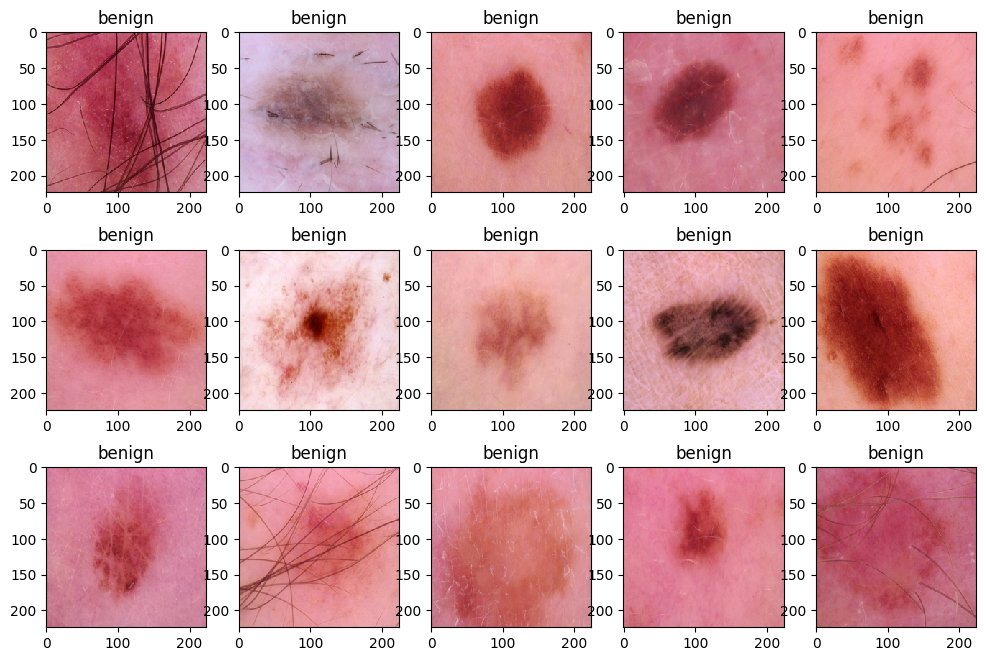

In [5]:
# Visualizing Train Images
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if train_labels[i] == 0:
        ax.title.set_text('benign')
    elif train_labels[i] == 1:
        ax.title.set_text('malignant')
    plt.imshow(train_images[i], interpolation='nearest')
plt.show()

In [6]:
# Test Images
new_size=224
test_images=[]
test_labels=[]
for i in os.listdir(testpath):# entering to the test folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(testpath +'/' + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  class_cancer={'benign':0,'malignant':1}
  for j in files:
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      test_images.append(list(resize_image))
      test_labels.append(class_cancer[i])

Entering to the folder name: benign
Number of images in the folder is 25
Entering to the folder name: malignant
Number of images in the folder is 25


In [7]:
def list_to_array_train(train_images,train_labels):
  return np.array(train_images),np.array(train_labels)

X_train,y_train=list_to_array_train(train_images,train_labels)


def list_to_array_test(test_images,test_labels):
  return np.array(test_images),np.array(test_labels)


X_test,y_test=list_to_array_test(test_images,test_labels)

In [9]:
print(X_train.shape)
print("*"*20)
print(y_train.shape)
print("*"*20)
print(X_test.shape)
print(y_test.shape)

(50, 224, 224, 3)
********************
(50,)
********************
(50, 224, 224, 3)
(50,)


In [8]:
def keras_to_categorical(y_train,y_test):
  return to_categorical(y_train),to_categorical(y_test)

y_train,y_test=keras_to_categorical(y_train,y_test)
y_train.shape,y_test.shape

((50, 2), (50, 2))

In [9]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  d1=Dense(units=64,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=32,kernel_initializer="glorot_uniform", activation='sigmoid')(d1)
  d3=Dense(units=2,kernel_initializer="glorot_uniform", activation='softmax')(d2)
  output = Model(inputs =VGG_model.input, outputs =d3)
  
  return output

model16=model_vgg16()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 41s 1us/step


In [10]:
model16.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'],run_eagerly=True)
history = model16.fit(X_train, y_train, validation_split=0.2,epochs= 10, batch_size= 1, verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.5108 - loss: 0.7762 - val_accuracy: 0.8600 - val_loss: 0.4657
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.8372 - loss: 0.3938 - val_accuracy: 0.8200 - val_loss: 0.3924
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9160 - loss: 0.2256 - val_accuracy: 0.9000 - val_loss: 0.2859
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 1.0000 - loss: 0.0953 - val_accuracy: 0.8200 - val_loss: 0.4260
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 1.0000 - loss: 0.0597 - val_accuracy: 0.8600 - val_loss: 0.3092
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 1.0000 - loss: 0.0471 - val_accuracy: 0.9000 - val_loss: 0.3099
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 1.0000 - loss: 0.0296 - val_accuracy: 0.9000 - val_loss: 0.2804
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 1.0000 - loss: 0.0230 - val_accuracy: 0.8800 - val_loss:

B. Use a pretrained VGG-16 model on Imagenet dataset by removing the top fully connected layers and extracting the deep features and modelling them using a Random Forest classifier for classifying the two class Skin_Cancer RGB dataset given in Teams.

In [19]:
def model_vgg16_x():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  
  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model16_x=model_vgg16_x()

model16_x.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'],run_eagerly=True)

import pickle


pickle.dump(model16_x, open('model16_x.pkl','wb'))
train_feature_16_x=model16_x.predict(X_train)
test_feature_16_x=model16_x.predict(X_test)

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_16_x,y_train)
train_pred=rf.predict(train_feature_16_x)
test_pred=rf.predict(test_feature_16_x)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))


2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step
Train Accuracy Score 1.0
Test Accuracy Score 0.84


C.	Use pretrained VGG-16 and VGG-19 model on Imagenet dataset by removing the top fully connected layers and extract the deep features, fuse the deep features and model them using a Random Forest classifier for classifying the two class Skin_Cancer RGB dataset given in Teams.

In [21]:
def model_vgg19():
  VGG_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
 
  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model_FE_19=model_vgg19()

model_FE_19.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'],run_eagerly=True)
pickle.dump(model_FE_19, open('model_FE_19.pkl','wb'))
train_feature_19=model_FE_19.predict(X_train)
test_feature_19=model_FE_19.predict(X_test)

final_train=np.hstack((train_feature_16_x,train_feature_19))
final_test=np.hstack((test_feature_16_x,test_feature_19))

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(final_train,y_train)
train_pred=rf.predict(final_train)
test_pred=rf.predict(final_test)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))


2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step
Train Accuracy Score 1.0
Test Accuracy Score 0.82


<h3>2. Three Class Classification of Orange_Dataset </h3>

A. Use a pretrained VGG-16 model on Imagenet dataset by removing the top fully connected layers and adding three dense layers having 64, 32 and 3 neurons with relu, sigmoid and softmax activation functions respectively for classifying the three class Orange_Dataset RGB dataset given in Teams. 

In [46]:
#data path
trainpath = 'C:\\Users\\Admin\\Desktop\\122CS0071\\Lab-7\\Orange_Dataset\\train'#Please give the path where you are saving the train folder.
testpath = 'C:\\Users\\Admin\\Desktop\\122CS0071\\Lab-7\\Orange_Dataset\\test'#please give the path where you are saving the test folder.

new_size=224
train_images=[]
train_labels=[]
for i in os.listdir(trainpath):#entering train folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(trainpath+'/' + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:# reading each images
      class_citrus={'Healthy':0,'BlackSpot':1,'Anthracnose':2}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      train_images.append(list(resize_image))
      train_labels.append(class_citrus[i])
      

Entering to the folder name: Anthracnose
Number of images in the folder is 30
Entering to the folder name: BlackSpot
Number of images in the folder is 30
Entering to the folder name: Healthy
Number of images in the folder is 30


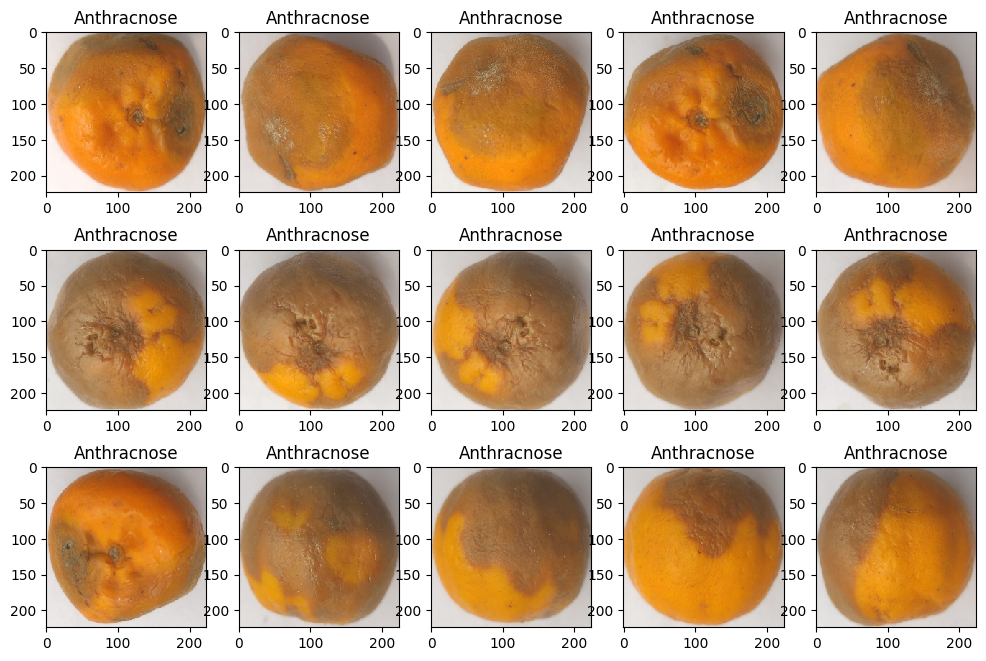

In [47]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if train_labels[i] == 0:
        ax.title.set_text('Healthy')
    elif train_labels[i] == 1:
        ax.title.set_text('BlackSpot')
    elif train_labels[i] == 2:
        ax.title.set_text('Anthracnose')
    plt.imshow(train_images[i], interpolation='nearest')
plt.show()

In [48]:
new_size=224
test_images=[]
test_labels=[]
for i in os.listdir(testpath):# entering to the test folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(testpath +'/' + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:
      class_citrus={'Healthy':0,'BlackSpot':1,'Anthracnose':2}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      test_images.append(list(resize_image))
      test_labels.append(class_citrus[i])

Entering to the folder name: Anthracnose
Number of images in the folder is 25
Entering to the folder name: BlackSpot
Number of images in the folder is 25
Entering to the folder name: Healthy
Number of images in the folder is 25


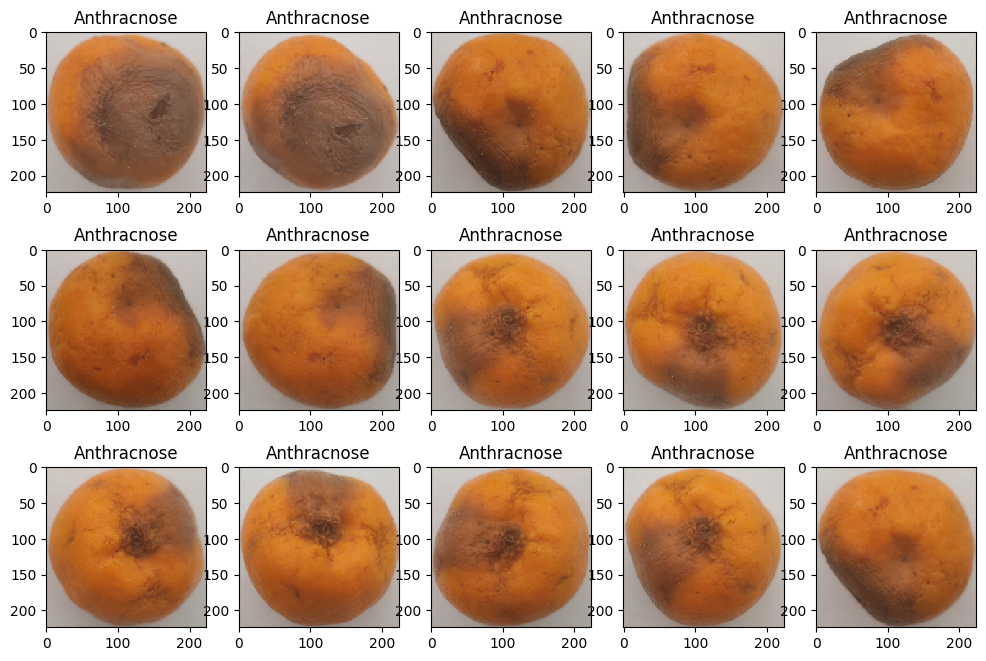

In [39]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if test_labels[i] == 0:
        ax.title.set_text('Healthy')
    elif test_labels[i] == 1:
        ax.title.set_text('BlackSpot')
    elif test_labels[i] == 2:
        ax.title.set_text('Anthracnose')
    plt.imshow(test_images[i], interpolation='nearest')
plt.show()

In [49]:
def list_to_array_train(train_images,train_labels):
  return np.array(train_images),np.array(train_labels)

X_train,y_train=list_to_array_train(train_images,train_labels)


def list_to_array_test(test_images,test_labels):
  return np.array(test_images),np.array(test_labels)


X_test,y_test=list_to_array_test(test_images,test_labels)


In [50]:
print(X_train.shape)
print("*"*20)
print(y_train.shape)
print("*"*20)
print(X_test.shape)
print(y_test.shape)

(90, 224, 224, 3)
********************
(90,)
********************
(75, 224, 224, 3)
(75,)


In [51]:
def keras_to_categorical(y_train,y_test):
  return to_categorical(y_train),to_categorical(y_test)

y_train,y_test=keras_to_categorical(y_train,y_test)

In [52]:
y_train.shape,y_test.shape

((90, 3), (75, 3))

In [53]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  d1=Dense(units=64,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=32,kernel_initializer="glorot_uniform", activation='sigmoid')(d1)
  
  d3=Dense(units=3,kernel_initializer="glorot_uniform", activation='softmax')(d2)
  output = Model(inputs =VGG_model.input, outputs =d3)
 
  return output

model16=model_vgg16()

In [54]:
model16.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'],run_eagerly=True)
history = model16.fit(X_train, y_train, validation_split=0.2,
                    epochs= 10, batch_size= 1, verbose=1,validation_data=(X_test,y_test)
                   )

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.6625 - loss: 0.7801 - val_accuracy: 1.0000 - val_loss: 0.1968
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 1.0000 - loss: 0.0951 - val_accuracy: 1.0000 - val_loss: 0.1221
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 1.0000 - loss: 0.0530 - val_accuracy: 1.0000 - val_loss: 0.0932
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 1.0000 - loss: 0.0388 - val_accuracy: 1.0000 - val_loss: 0.0638
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 1.0000 - loss: 0.0297 - val_accuracy: 1.0000 - val_loss: 0.0441
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 1.0000 - loss: 0.0216 - val_accuracy: 1.0000 - val_loss: 0.0341
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 1.0000 - loss: 0.0180 - val_accuracy: 1.0000 - val_loss: 0.0325
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 1.0000 - loss: 0.0148 - val_accuracy: 1.0000 - v

B.	Use a pretrained VGG-16 model on Imagenet dataset by removing the top fully connected layers and extracting the deep features and modelling them using a Random Forest classifier for classifying the three class Orange_Dataset RGB dataset given in Teams.

In [55]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  output = Model(inputs =VGG_model.input, outputs =feature)
 
  return output

model16=model_vgg16()

model16.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'],run_eagerly=True)


In [56]:
import pickle


pickle.dump(model16, open('model16_orng.pkl','wb'))
train_feature_16=model16.predict(X_train)
test_feature_16=model16.predict(X_test)

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_16,y_train)
train_pred=rf.predict(train_feature_16)
test_pred=rf.predict(test_feature_16)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))


3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step
Train Accuracy Score 1.0
Test Accuracy Score 1.0


C.	Use pretrained VGG-16 and VGG-19 model on Imagenet dataset by removing the top fully connected layers and extract the deep features, fuse the deep features and model them using a Random Forest classifier for classifying the three class Orange_Dataset RGB dataset given in Teams.

In [59]:
def model_vgg19():
  VGG19_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG19_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG19_model.output)
  
  output = Model(inputs =VGG19_model.input, outputs =feature)
  
  return output

model19=model_vgg19()



model19.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

pickle.dump(model19, open('model_FE_19_orng.pkl','wb'))
train_feature_19=model_FE_19.predict(X_train)
test_feature_19=model_FE_19.predict(X_test)

final_train=np.hstack((train_feature_16,train_feature_19))
final_test=np.hstack((test_feature_16,test_feature_19))
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(final_train,y_train)
train_pred=rf.predict(final_train)
test_pred=rf.predict(final_test)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))


3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 9s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 7s/step
Train Accuracy Score 1.0
Test Accuracy Score 1.0


In [61]:
from tensorflow.keras.applications import InceptionV3

In [63]:
def Google_net():
  INCEP_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in INCEP_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(INCEP_model.output)
 
  output = Model(inputs =INCEP_model.input, outputs =feature)
  
  return output

model_google_net=Google_net()

In [65]:
model_google_net.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'],run_eagerly=True)



In [67]:
pickle.dump(model_google_net, open('google_net.pkl','wb'))
train_feature_gnet=model_google_net.predict(X_train)
test_feature_gnet=model_google_net.predict(X_test)

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_gnet,y_train)
train_pred=rf.predict(train_feature_gnet)
test_pred=rf.predict(test_feature_gnet)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Train Accuracy Score 1.0
Test Accuracy Score 1.0
